## Recurrent Neural Network on Twitter Sentiment140 dataset

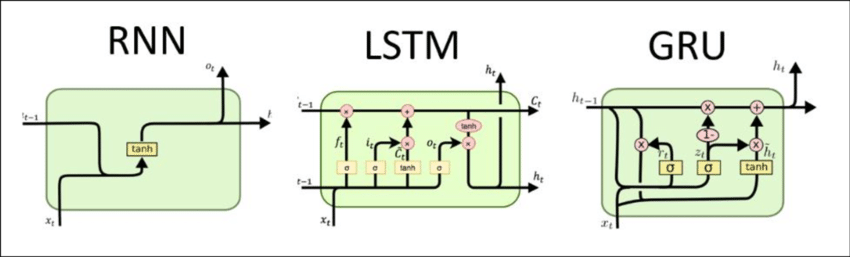

#### Recurrent Neural Network
-  RNN is a type of neural network architecture designed to work with sequences of data.
- The key idea is to capture and utilize temporal dependencies in sequential data. - It is commonly used for natural language processing, speech recognition, time series analysis, and other applications where the order of the input data matters.

#### Types of RNN

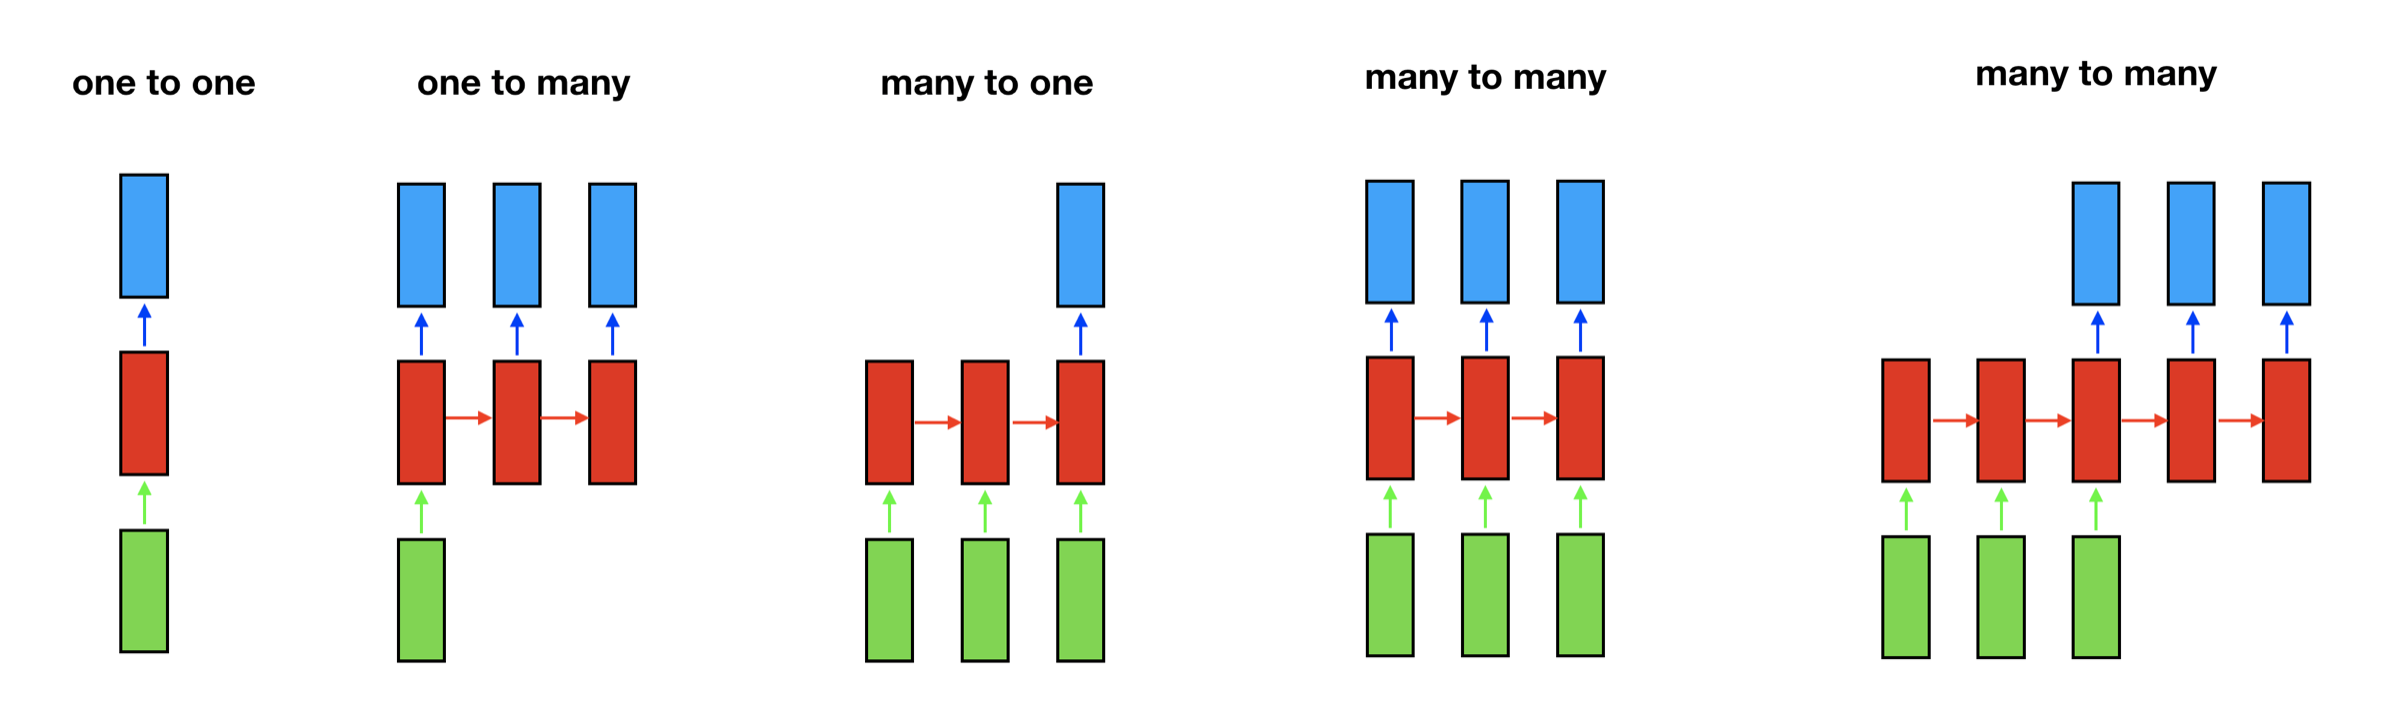

#### Objective
- The objective is to build RNN Model using SimpleRNN Integer, SimpleRNN Embedding, LSTM, GRU, Deep RNN, Deep LSTM, Deep GRU and Bi Directional LSTM algorithms.

#### Dataset source & brief
- The dataset has been sourced from kaggle named Sentiment140 dataset and contains 1,600,000 tweets extracted using the twitter api. The tweets have been annotated (0 = negative, 4 = positive).
It contains the following 6 fields:target,
ids, date, flag,user and text.

#### Importing basic libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Importing Deep learning libraries

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, SimpleRNN, Embedding, Flatten, LSTM, GRU, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model

import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [9]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None, names=['polarity', 'id', 'date', 'query', 'user', 'text'])
df.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.columns

Index(['polarity', 'id', 'date', 'query', 'user', 'text'], dtype='object')

In [11]:
df.shape

(1600000, 6)

#### Data preprocessing

In [12]:
df=df[['polarity','text']]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1600000 non-null  int64 
 1   text      1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [14]:
df.isnull().sum()

polarity    0
text        0
dtype: int64

In [15]:
df['polarity'].value_counts()

0    800000
4    800000
Name: polarity, dtype: int64

- The dataset is completely balanced

#### Separating positive and negative rows

In [16]:
df_pos = df[df['polarity'] == 4]
df_neg = df[df['polarity'] == 0]
print(len(df_pos), len(df_neg))

800000 800000


#### Retaining only 1/4th from each group as dataset is huge

In [17]:
df_pos = df_pos.iloc[:int(len(df_pos)/4)]
df_neg = df_neg.iloc[:int(len(df_neg)/4)]
print(len(df_pos), len(df_neg))

200000 200000


#### Concatenating both datasets

In [18]:
df = pd.concat([df_pos, df_neg])
len(df)

400000

#### Clean the text variable

In [19]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    for url in urls:
        text = text.replace(url, 'URL_PLACEHOLDER')
    return text

In [20]:
df['text'] = df['text'].apply(clean_text)

In [21]:
df['text'][3]

'my whole body feels itchy and like its on fire'

#### Label Encoding for polarity variable (0 for negative, 4 for positive)

In [22]:
le = LabelEncoder()
df['polarity'] = le.fit_transform(df['polarity'])

#### Split the dataset into training and Testing data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df['text'],df['polarity'],test_size=0.25, random_state=42)

print(x_train.shape, y_train.shape),( x_test.shape, y_test.shape)

(300000,) (300000,)


(None, ((100000,), (100000,)))

#### Tokenise the text variable
- It involves breaking down a sequence of text into smaller units.

In [24]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

In [25]:
tokenizer.word_index

{'i': 1,
 'to': 2,
 'the': 3,
 'a': 4,
 'my': 5,
 'and': 6,
 'you': 7,
 'is': 8,
 'it': 9,
 'in': 10,
 'for': 11,
 'of': 12,
 'im': 13,
 'on': 14,
 'me': 15,
 'have': 16,
 'so': 17,
 'that': 18,
 'but': 19,
 'just': 20,
 'with': 21,
 'be': 22,
 'at': 23,
 'its': 24,
 'not': 25,
 'was': 26,
 'day': 27,
 'this': 28,
 'good': 29,
 'up': 30,
 'now': 31,
 'all': 32,
 'out': 33,
 'get': 34,
 'are': 35,
 'like': 36,
 'go': 37,
 'no': 38,
 'work': 39,
 'do': 40,
 'dont': 41,
 'your': 42,
 'today': 43,
 'going': 44,
 'too': 45,
 'cant': 46,
 'love': 47,
 'got': 48,
 'am': 49,
 'back': 50,
 'time': 51,
 'from': 52,
 'what': 53,
 'lol': 54,
 'will': 55,
 'one': 56,
 'about': 57,
 'we': 58,
 'had': 59,
 'know': 60,
 'u': 61,
 'really': 62,
 'some': 63,
 'can': 64,
 'well': 65,
 'night': 66,
 'see': 67,
 'if': 68,
 'still': 69,
 'think': 70,
 'how': 71,
 'home': 72,
 'want': 73,
 'new': 74,
 'thanks': 75,
 'amp': 76,
 'there': 77,
 'as': 78,
 'morning': 79,
 'when': 80,
 'last': 81,
 'more': 82,
 '

In [26]:
tokenizer.document_count

300000

#### Convert text data to sequences
- It involves assigning a unique numeric index to each word or subword in the vocabulary.

In [27]:
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [32]:
print(len(x_train[2]))
print(len(x_train[10]))
print(len(x_train[20]))

82
38
59


#### Pad sequences
- It is is done to ensure that all sequences have the same length.

In [33]:
max_len_train = max(len(seq) for seq in train_sequences)
x_train = pad_sequences(train_sequences, maxlen=max_len_train)

In [34]:
print(len(x_train[2]))
print(len(x_train[10]))
print(len(x_train[20]))

36
36
36


In [35]:
max_len_test = max(len(seq) for seq in train_sequences)
x_test = pad_sequences(test_sequences, maxlen=max_len_test)

#### 1. Simple RNN Integer encoding method
- Represents text as sequences of integer indices.

In [36]:
timesteps=len(x_train[0])

In [37]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(timesteps,1), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_integer=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
9375/9375 [==============================] - 138s 14ms/step - loss: 0.6933 - accuracy: 0.5053 - val_loss: 0.6942 - val_accuracy: 0.5029
Epoch 2/5
9375/9375 [==============================] - 134s 14ms/step - loss: 0.6927 - accuracy: 0.5079 - val_loss: 0.6918 - val_accuracy: 0.5059
Epoch 3/5
9375/9375 [==============================] - 130s 14ms/step - loss: 0.6922 - accuracy: 0.5091 - val_loss: 0.6926 - val_accuracy: 0.5076
Epoch 4/5
9375/9375 [==============================] - 118s 13ms/step - loss: 0.6918 - accuracy: 0.5113 - val_loss: 0.6908 - val_accuracy: 0.5142
Epoch 5/5
9375/9375 [==============================] - 125s 13ms/step - loss: 0.6911 - accuracy: 0.5130 - val_loss: 0.6902 - val_accuracy: 0.5156


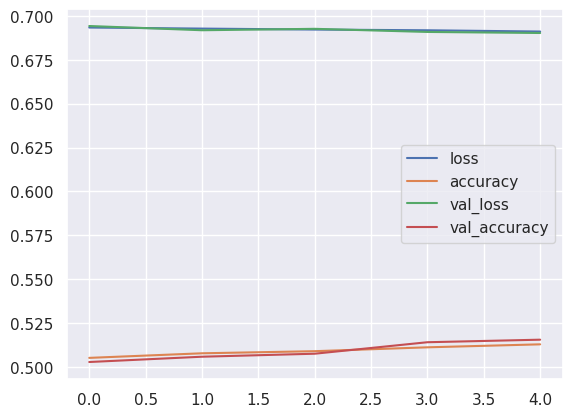

In [39]:
pd.DataFrame(history_integer.history).plot()
plt.show()

#### 2. Simple RNN using Embedding method
- Represents text as sequences of pre-trained dense vectors.

In [40]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len_train))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 36, 32)            320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_embedding=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
9375/9375 [==============================] - 283s 30ms/step - loss: 0.3242 - accuracy: 0.8616 - val_loss: 0.4881 - val_accuracy: 0.7856
Epoch 2/5
9375/9375 [==============================] - 269s 29ms/step - loss: 0.3033 - accuracy: 0.8725 - val_loss: 0.5054 - val_accuracy: 0.7842
Epoch 3/5
9375/9375 [==============================] - 268s 29ms/step - loss: 0.2841 - accuracy: 0.8826 - val_loss: 0.5348 - val_accuracy: 0.7795
Epoch 4/5
9375/9375 [==============================] - 274s 29ms/step - loss: 0.2667 - accuracy: 0.8911 - val_loss: 0.5519 - val_accuracy: 0.7695
Epoch 5/5
9375/9375 [==============================] - 281s 30ms/step - loss: 0.2512 - accuracy: 0.8982 - val_loss: 0.5725 - val_accuracy: 0.7633


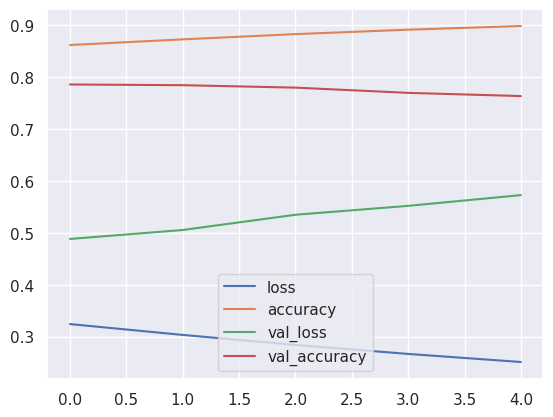

In [44]:
pd.DataFrame(history_embedding.history).plot()
plt.show()

#### Limitations of Simple RNN model
- Difficulty in Learning Long-Term Dependencies
- Vanishing Gradient Problem
- Exploding Gradient Problem

#### 3. LSTM method
- Long Short-Term Memory is a type of RNN architecture designed to overcome the limitations of traditional RNNs, specifically with regard to capturing and learning long-term dependencies in sequential data.
- It employs three gates - input gate, forget gate, and output gate. It uses the forget gate to decide what information from the cell state to discard and the input gate to decide what new information to store.
- LSTM maintains a separate cell state and hidden state. The cell state helps store and carry long-term information.

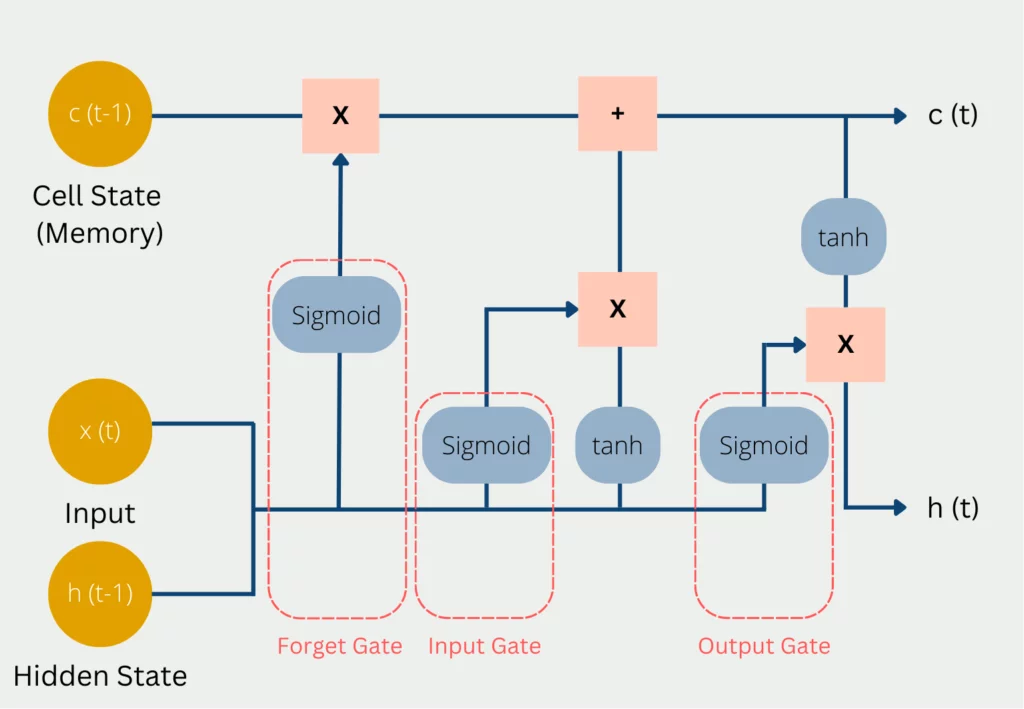

In [46]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len_train))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 36, 32)            320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
9375/9375 [==============================] - 84s 9ms/step - loss: 0.4541 - accuracy: 0.7860 - val_loss: 0.4273 - val_accuracy: 0.8010
Epoch 2/5
9375/9375 [==============================] - 62s 7ms/step - loss: 0.4040 - accuracy: 0.8149 - val_loss: 0.4186 - val_accuracy: 0.8069
Epoch 3/5
9375/9375 [==============================] - 62s 7ms/step - loss: 0.3801 - accuracy: 0.8280 - val_loss: 0.4195 - val_accuracy: 0.8074
Epoch 4/5
9375/9375 [==============================] - 62s 7ms/step - loss: 0.3591 - accuracy: 0.8389 - val_loss: 0.4268 - val_accuracy: 0.8075
Epoch 5/5
9375/9375 [==============================] - 60s 6ms/step - loss: 0.3378 - accuracy: 0.8504 - val_loss: 0.4344 - val_accuracy: 0.8052


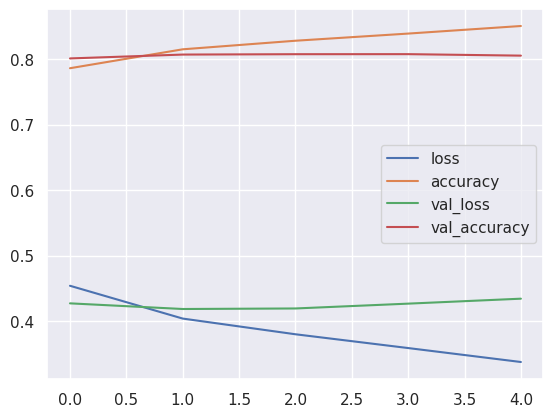

In [48]:
pd.DataFrame(history_lstm.history).plot()
plt.show()

#### 4. GRU method
- Gated Recurrent Unit (GRU) is a type of RNN architecture designed to address the challenges of learning long-term dependencies in sequential data just like LSTM.
- It has two gates - reset gate and update gate.
- Combines the hidden state and cell state into a single state, simplifying the architecture.

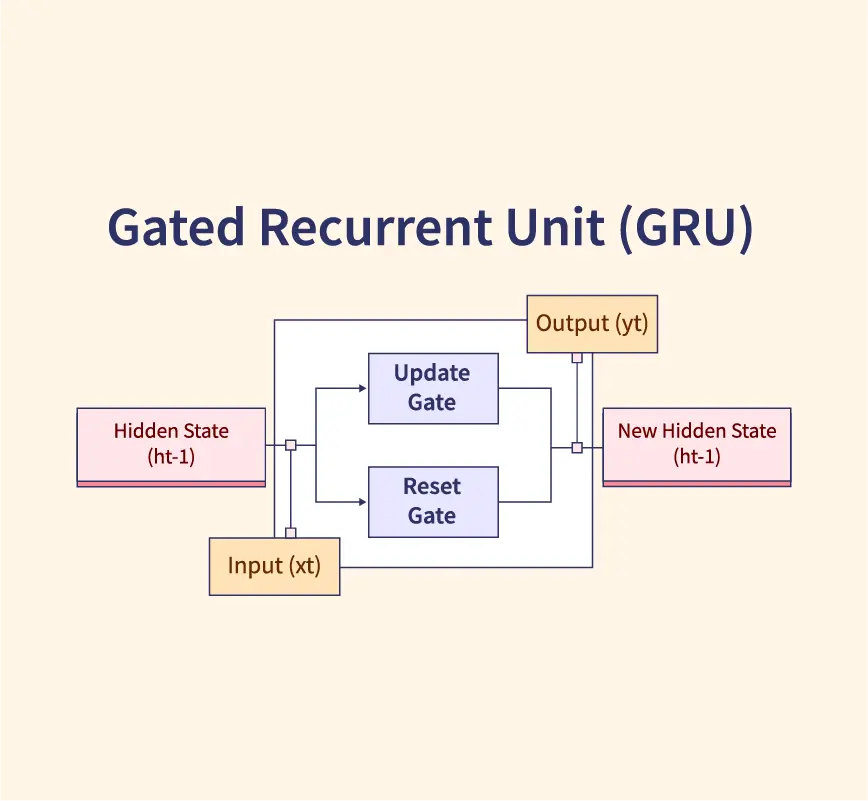

In [49]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len_train))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 36, 32)            320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326369 (1.24 MB)
Trainable params: 326369 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_gru=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
9375/9375 [==============================] - 79s 8ms/step - loss: 0.4551 - accuracy: 0.7852 - val_loss: 0.4382 - val_accuracy: 0.7967
Epoch 2/5
9375/9375 [==============================] - 59s 6ms/step - loss: 0.4073 - accuracy: 0.8132 - val_loss: 0.4216 - val_accuracy: 0.8045
Epoch 3/5
9375/9375 [==============================] - 61s 7ms/step - loss: 0.3812 - accuracy: 0.8279 - val_loss: 0.4181 - val_accuracy: 0.8077
Epoch 4/5
9375/9375 [==============================] - 62s 7ms/step - loss: 0.3604 - accuracy: 0.8390 - val_loss: 0.4229 - val_accuracy: 0.8048
Epoch 5/5
9375/9375 [==============================] - 62s 7ms/step - loss: 0.3401 - accuracy: 0.8492 - val_loss: 0.4398 - val_accuracy: 0.8049


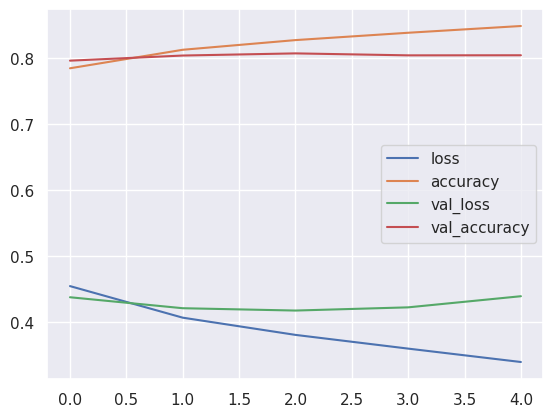

In [51]:
pd.DataFrame(history_gru.history).plot()
plt.show()

#### 5. Deep RNN
- Deep RNNs have two or more layers of recurrent units stacked vertically.
Each layer receives input from the previous layer, and the final layer's output is used for predictions.

In [52]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len_train))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 36, 32)            320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 36, 32)            2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 324193 (1.24 MB)
Trainable params: 324193 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_deeprnn=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
9375/9375 [==============================] - 596s 63ms/step - loss: 0.4750 - accuracy: 0.7735 - val_loss: 0.4537 - val_accuracy: 0.7900
Epoch 2/5
9375/9375 [==============================] - 578s 62ms/step - loss: 0.4279 - accuracy: 0.8031 - val_loss: 0.4434 - val_accuracy: 0.7960
Epoch 3/5
9375/9375 [==============================] - 561s 60ms/step - loss: 0.4006 - accuracy: 0.8188 - val_loss: 0.4434 - val_accuracy: 0.7948
Epoch 4/5
9375/9375 [==============================] - 531s 57ms/step - loss: 0.3746 - accuracy: 0.8326 - val_loss: 0.4623 - val_accuracy: 0.7896
Epoch 5/5
9375/9375 [==============================] - 560s 60ms/step - loss: 0.3516 - accuracy: 0.8464 - val_loss: 0.4641 - val_accuracy: 0.7845


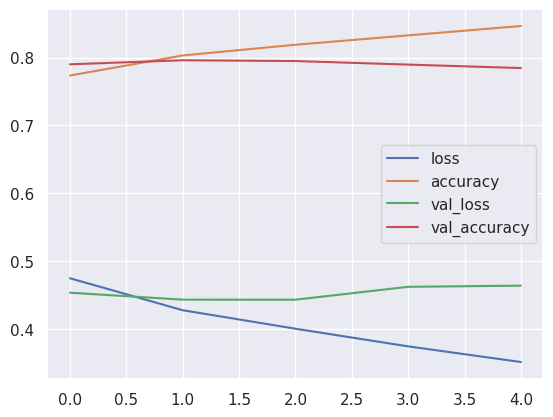

In [54]:
pd.DataFrame(history_deeprnn.history).plot()
plt.show()

#### 6. Deep LSTM


In [55]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len_train))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 36, 32)            320000    
                                                                 
 lstm_2 (LSTM)               (None, 36, 32)            8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_deeplstm=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
9375/9375 [==============================] - 120s 12ms/step - loss: 0.4537 - accuracy: 0.7846 - val_loss: 0.4258 - val_accuracy: 0.8018
Epoch 2/5
9375/9375 [==============================] - 99s 11ms/step - loss: 0.4038 - accuracy: 0.8149 - val_loss: 0.4178 - val_accuracy: 0.8066
Epoch 3/5
9375/9375 [==============================] - 96s 10ms/step - loss: 0.3799 - accuracy: 0.8286 - val_loss: 0.4199 - val_accuracy: 0.8070
Epoch 4/5
9375/9375 [==============================] - 85s 9ms/step - loss: 0.3581 - accuracy: 0.8401 - val_loss: 0.4325 - val_accuracy: 0.8048
Epoch 5/5
9375/9375 [==============================] - 84s 9ms/step - loss: 0.3364 - accuracy: 0.8518 - val_loss: 0.4415 - val_accuracy: 0.8012


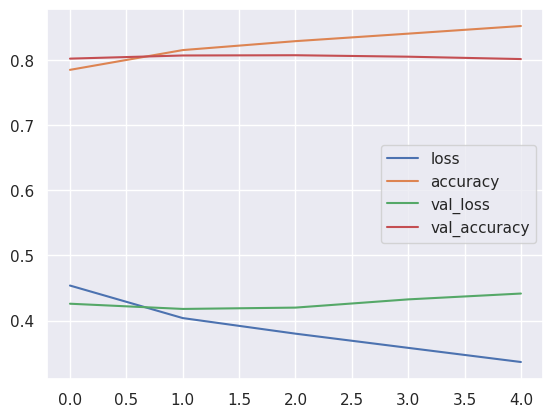

In [57]:
pd.DataFrame(history_deeplstm.history).plot()
plt.show()

#### 7. Deep GRU

In [58]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len_train))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 36, 32)            320000    
                                                                 
 gru_1 (GRU)                 (None, 36, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 32)                6336      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 332705 (1.27 MB)
Trainable params: 332705 (1.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_deepgru=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
9375/9375 [==============================] - 109s 11ms/step - loss: 0.4551 - accuracy: 0.7843 - val_loss: 0.4306 - val_accuracy: 0.7993
Epoch 2/5
9375/9375 [==============================] - 79s 8ms/step - loss: 0.4053 - accuracy: 0.8144 - val_loss: 0.4184 - val_accuracy: 0.8058
Epoch 3/5
9375/9375 [==============================] - 93s 10ms/step - loss: 0.3807 - accuracy: 0.8290 - val_loss: 0.4173 - val_accuracy: 0.8076
Epoch 4/5
9375/9375 [==============================] - 78s 8ms/step - loss: 0.3603 - accuracy: 0.8390 - val_loss: 0.4259 - val_accuracy: 0.8047
Epoch 5/5
9375/9375 [==============================] - 82s 9ms/step - loss: 0.3399 - accuracy: 0.8503 - val_loss: 0.4372 - val_accuracy: 0.8024


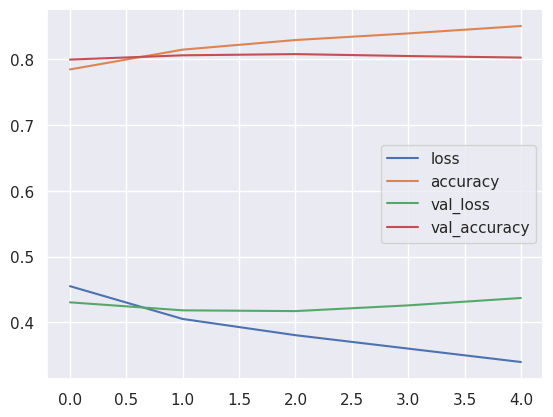

In [60]:
pd.DataFrame(history_deepgru.history).plot()
plt.show()

#### 8. Bidirectional LSTM
- Bidirectional LSTM is a type of RNN architecture that processes input data in both forward and backward directions.
- The bidirectional nature allows the network to capture information from past and future contexts simultaneously.

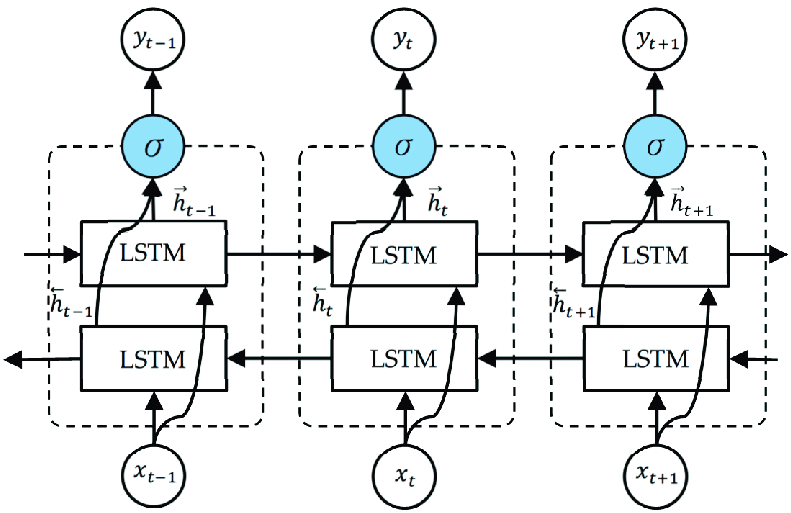

In [61]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_len_train))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 36, 32)            320000    
                                                                 
 bidirectional (Bidirection  (None, 36, 64)            16640     
 al)                                                             
                                                                 
 dense_7 (Dense)             (None, 36, 1)             65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_bidirectional=model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
9375/9375 [==============================] - 133s 13ms/step - loss: 0.4633 - accuracy: 0.7820 - val_loss: 0.4351 - val_accuracy: 0.7992
Epoch 2/5
9375/9375 [==============================] - 106s 11ms/step - loss: 0.4140 - accuracy: 0.8104 - val_loss: 0.4314 - val_accuracy: 0.7959
Epoch 3/5
9375/9375 [==============================] - 94s 10ms/step - loss: 0.3932 - accuracy: 0.8216 - val_loss: 0.4236 - val_accuracy: 0.8054
Epoch 4/5
9375/9375 [==============================] - 95s 10ms/step - loss: 0.3752 - accuracy: 0.8318 - val_loss: 0.4272 - val_accuracy: 0.8044
Epoch 5/5
9375/9375 [==============================] - 99s 11ms/step - loss: 0.3586 - accuracy: 0.8410 - val_loss: 0.4359 - val_accuracy: 0.8016


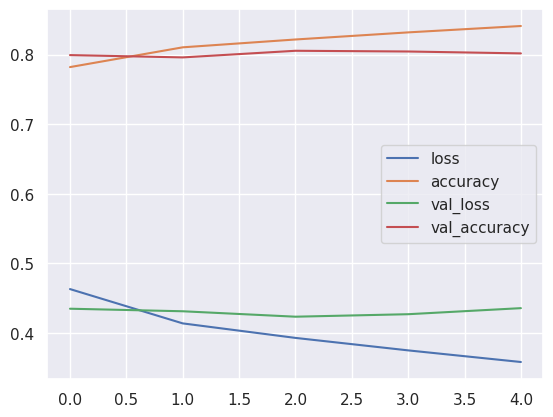

In [63]:
pd.DataFrame(history_bidirectional.history).plot()
plt.show()

#### Conclusion
- I tried to build various RNN models using Twitter Sentiment 140 dataset.
- Because of the huge size of dataset I retained only 1/4th part of the dataset and used 5 epochs to check Train and Test accuracy of each model.
- SimpleRNN Integer method gave the poorest result with Train and test accuracy at 51% each.
- SimpleRNN Embedding method gave better result with Train at 89% accuracy and Test at 76% accuracy but it posed overfitting problem.
- LSTM model, Deep LSTM & Deep GRU all had 85% Train accuracy and 80% Test accuracy.
- GRU and Bidirectional LSTM gave Train accuracy of 84% and Test accuracy of 80%
- Deep RNN gave Train accuracy of 84% and Test accuracy of 78%
- We can safely say all models are giving good accuracy except Simple RNN models.